# Steady State HTGR PyFLUENT Integration
*This code below installs PyFluent, imports .cas (case) file, hyper-initializes, runs calculation, saves, and displays the temperature profile.*
*Ansys Fluent Version 2024 R2 MUST BE USED. Ran on CAEN computer @ UM*

## Imports for pyfluent, Matplotlib, and os; Ansys Fluent Core Installation

In [128]:
%matplotlib inline
!pip install ansys.fluent.core
import ansys.fluent.core as pyfluent
import os 
import warnings


## Verify Fluent Path

In [129]:
fluent_path = r"C:\Program Files\ANSYS Inc\v242\fluent\ntbin\win64\fluent.exe"
print("Fluent executable found:", os.path.exists(fluent_path))

Fluent executable found: True


## Fluent GUI Launch
To hide GUI, set show_gui = False

In [130]:
warnings.filterwarnings("ignore")
os.environ["AWP_ROOT"] = r"C:\Program Files\ANSYS Inc\v242\fluent\ntbin\win64"
fluent_path = r"C:\Program Files\ANSYS Inc\v242\fluent\ntbin\win64\fluent.exe"

if not os.path.exists(fluent_path):
    raise FileNotFoundError(f"Fluent executable not found at {fluent_path}")

solver = pyfluent.launch_fluent(show_gui = True, mode="solver", fluent_path=fluent_path)
solver.health_check.is_serving

pyfluent.general WARNING: Using 'ui_mode = UIMode.GUI' for 'launch_fluent()' instead of 'show_gui = True'.


True

# Load in .cas File
.cas (case files) contains the entire setup information (the overall mesh, boundary conditions, mesh interfaces, etc.)

In [131]:
#solver.file.read_mesh(file_name = "htgr1.7.msh")
#solver.file.read_mesh(file_name = "htgr_v242file.msh")
#solver.file.read_mesh(file_name = "737.msh")

case_file_path = "1.8.cas.h5" 
solver.file.read(file_type="case", file_name=case_file_path)



#wbpj_file = "Fluent_ONC_12_11_24.wbpj"
#solver.file.read(file_type="wbpj", file_name=wbpj_file)

Fast-loading "C:\PROGRA~1\ANSYSI~1\v242\fluent\fluent24.2.0\\addons\afd\lib\hdfio.bin"
Done.
Multicore processors detected. Processor affinity set!

Reading from caenvdi2024-70:"\\engin-labs.m.storage.umich.edu\engin-labs\home\jacc\windat.v2\Desktop\1.8.cas.h5" in NODE0 mode ...
  Reading mesh ...
       70016 cells,     4 cell zones ...
           1764 hexahedral cells,  zone id: 7
            777 hexahedral cells,  zone id: 8
          36202 tetrahedral cells,  zone id: 6
          31273 tetrahedral cells,  zone id: 9
      150853 faces,    24 face zones ...
              1 mixed wall face ,  zone id: 28
             94 mixed interior faces,  zone id: 16
             70 mixed interior faces,  zone id: 1
           4490 quadrilateral interior faces,  zone id: 3
           2014 quadrilateral interior faces,  zone id: 4
          69917 triangular interior faces,  zone id: 2
          58037 triangular interior faces,  zone id: 5
            588 quadrilateral symmetry faces,  zone id: 13


In [132]:
#solver.setup.boundary_conditions()



In [133]:
#heated_wall = solver.setup.boundary_conditions.wall['heated_wall']
#print(dir(heated_wall))
# Print the state of the 'thermal' attribute of 'heated_wall'
thermal_state = solver.setup.boundary_conditions.wall['heated_wall'].thermal.get_state()
print(thermal_state)

{'thermal_condition': 'Temperature', 'material': 'aluminum', 'temperature': {'option': 'value', 'value': 638}, 'wall_thickness': {'option': 'value', 'value': 0}, 'heat_generation_rate': {'option': 'value', 'value': 0}, 'enable_shell_conduction': False, 'caf': {'option': 'value', 'value': 1}}


In [134]:
# Access the current state of the 'thermal' attribute
thermal_state = solver.setup.boundary_conditions.wall['heated_wall'].thermal.get_state()

# Modify the temperature to 638 K
thermal_state['temperature']['value'] = 760+273.15  # Set temperature to 638K

# Apply the updated state
solver.setup.boundary_conditions.wall['heated_wall'].thermal.set_state(thermal_state)

# Verify the change
print(solver.setup.boundary_conditions.wall['heated_wall'].thermal.get_state())


{'thermal_condition': 'Temperature', 'material': 'aluminum', 'temperature': {'option': 'value', 'value': 1033.15}, 'wall_thickness': {'option': 'value', 'value': 0}, 'heat_generation_rate': {'option': 'value', 'value': 0}, 'enable_shell_conduction': False, 'caf': {'option': 'value', 'value': 1}}


In [135]:
# Access the current state of the 'unheated_wall-fff_unheated_section' boundary condition
unheated_wall_state = solver.setup.boundary_conditions.wall['unheated_wall-fff_unheated_section'].thermal.get_state()

# Print the state to inspect the current settings
print(unheated_wall_state)

{'thermal_condition': 'Convection', 'material': 'aluminum', 'heat_transfer_coeff': {'option': 'value', 'value': 1}, 'free_stream_temp': {'option': 'value', 'value': 300}, 'wall_thickness': {'option': 'value', 'value': 0}, 'heat_generation_rate': {'option': 'value', 'value': 0}, 'enable_shell_conduction': False, 'caf': {'option': 'value', 'value': 1}}


In [136]:
# Access the current state of the 'unheated_wall-fff_unheated_section' boundary condition
unheated_wall_state = solver.setup.boundary_conditions.wall['unheated_wall-fff_unheated_section'].thermal.get_state()

# Print the current state to inspect the settings
print("Current State: ", unheated_wall_state)

# Modify the heat transfer coefficient to a new value (example: 10 W/m²K)
unheated_wall_state['heat_transfer_coeff']['value'] = 1  # Set heat transfer coefficient to 10

# Apply the updated state
solver.setup.boundary_conditions.wall['unheated_wall-fff_unheated_section'].thermal.set_state(unheated_wall_state)

# Verify the change
print("Updated State: ", solver.setup.boundary_conditions.wall['unheated_wall-fff_unheated_section'].thermal.get_state())


Current State:  {'thermal_condition': 'Convection', 'material': 'aluminum', 'heat_transfer_coeff': {'option': 'value', 'value': 1}, 'free_stream_temp': {'option': 'value', 'value': 300}, 'wall_thickness': {'option': 'value', 'value': 0}, 'heat_generation_rate': {'option': 'value', 'value': 0}, 'enable_shell_conduction': False, 'caf': {'option': 'value', 'value': 1}}
Updated State:  {'thermal_condition': 'Convection', 'material': 'aluminum', 'heat_transfer_coeff': {'option': 'value', 'value': 1}, 'free_stream_temp': {'option': 'value', 'value': 300}, 'wall_thickness': {'option': 'value', 'value': 0}, 'heat_generation_rate': {'option': 'value', 'value': 0}, 'enable_shell_conduction': False, 'caf': {'option': 'value', 'value': 1}}


## Initialize Problem with Hybrid Model
You can use standard initialization as well

In [137]:
solver.solution.initialization.hybrid_initialize()


Initialize using the hybrid initialization method.

Checking case topology... 
-This case has no inlets & no outlets 
-Case will be initialized with constant parameters

Hybrid initialization is done.


## Run calculation with iteration count

In [138]:
solver.solution.run_calculation.iterate(iter_count = 10)


  iter  continuity  x-velocity  y-velocity  z-velocity      energy     time/iter
     1  0.0000e+00  0.0000e+00  5.9928e-02  0.0000e+00  6.6343e-04  0:00:18    9
     2  1.0000e+00  5.3480e-02  1.4034e-01  5.3373e-02  6.4411e-04  0:00:16    8
     3  6.1779e-01  4.3472e-02  6.2317e-02  4.2538e-02  5.0843e-04  0:00:13    7
     4  3.9389e-01  2.9775e-02  4.0395e-02  2.9374e-02  3.9634e-04  0:00:10    6
     5  2.7319e-01  6.4078e-02  8.0003e-02  6.3069e-02  3.1568e-04  0:00:08    5
     6  2.2919e-01  9.7872e-02  1.2039e-01  9.7056e-02  2.5213e-04  0:00:06    4
     7  1.9332e-01  5.9720e-02  7.4994e-02  5.9766e-02  2.2972e-04  0:00:03    3
     8  1.5699e-01  4.5280e-02  5.6988e-02  4.5562e-02  2.0686e-04  0:00:02    2
     9  1.2975e-01  3.5162e-02  4.3879e-02  3.5333e-02  1.9542e-04  0:00:01    1
    10  1.1270e-01  3.0080e-02  3.7837e-02  2.9951e-02  1.8296e-04  0:00:00    0


## Create and Save Temperature Contour Plot

In [139]:
solver.results.graphics.contour.create("temperature-contour-plot")
solver.results.graphics.contour["temperature-contour-plot"](field = "temperature", surfaces_list = ["fff_heated_section", "fff_left_unheated", "fff_opening", "fff_unheated_section", "heated_unheated_interface-contact_region_3-src", "unheated_heated_interface-contact_region_3-trg", "unheated_heated_interface-contact_region_4-trg","symmetry-fff_heated_section","symmetry-fff_left_unheated","symmetry-fff_opening","symmetry-fff_unheated_section","opening_wall","unheated_wall-fff_left_unheated","unheated_wall-fff_unheated_section"])
solver.results.graphics.contour["temperature-contour-plot"].display()
solver.results.graphics.views.auto_scale()
solver.results.graphics.picture.save_picture(file_name = "760.1.0temperature.png")


## Display Temperature Plot in Jupyter

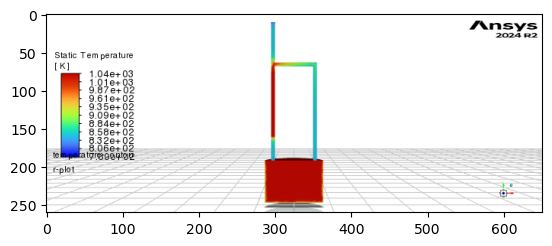

In [140]:
import matplotlib.pyplot as plt
import matplotlib.image as image
tempimage = image.imread("760.1.0temperature.png")
plt.imshow(tempimage)
#plt.axis('off')  
plt.show()

## Exit Ansys Fluent Session

In [141]:
solver.exit()

## Ignore this from here down

In [142]:
#solver.setup.materials()

In [ ]:
#viscous = pyfluent.solver.Viscous(settings_source=solver)
#viscous.model = 'laminar'

In [ ]:
#models = pyfluent.solver.Models(settings_source=solver)

In [ ]:
#models.print_state()

In [ ]:
#solver.setup.materials.database.list_materials()

In [ ]:
#solver.setup.materials.database.copy_by_name.argument_names

In [ ]:
#solver.setup.materials.database.copy_by_name(type = 'fluid', name = 'helium')

In [ ]:
#solver.setup.materials.list_materials()

In [ ]:
#solver.setup.cell_zone_conditions.fluid['fff_opening'].material = 'helium'

In [ ]:
#solver.setup.cell_zone_conditions.fluid()  # NOT SURE WHAT PART HAS HELIUM ASK, we can change it easily tho

In [ ]:
print(dir(solver.setup.boundary_conditions))
    
#solver.setup.boundary_conditions))

In [ ]:
#print(dir(
#solver.setup.boundary_conditions.velocity_inlet()

In [ ]:
#available_surfaces = solver.tui.surface.list_surfaces()
#print(available_surfaces)